**Problem Statement:**

In today’s digital marketplace, organizations receive vast volumes of customer feedback across online platforms, making manual sentiment interpretation inefficient and error-prone. Converting this unstructured text into actionable insights is a major business challenge.

This project focuses on building an intelligent sentiment analysis system using Amazon Alexa customer reviews. The objective is to **automatically classify customer feedback as positive or negative by leveraging advanced Natural Language Processing techniques, machine learning & fine-tuned BERT transformer models.**

The system performs end-to-end processing including **data cleaning, exploratory data analysis, text preprocessing, model training, evaluation, and deployment.** The final model is **hosted on the Hugging Face Hub** and integrated into a **Streamlit web application** to deliver real-time sentiment predictions for business decision support.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
!pip install emoji
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
%pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 30.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**NOTE:**

1.   **Initial EDA** was performed on the **raw reviews** to understand the dataset in its natural form. This included analyzing **the distribution of ratings, feedback, variations, review lengths, date and their relationships.**

2.   **Detailed text preprocessing** was then applied to the **'review'** column — including **demojizing, lowercasing, tokenization, spellchecking, stopword removal, and lemmatization** — to clean and normalize the text. This processed data was further used for in-depth text analysis and for building machine learning models.









**EXPLORATORY DATA ANALYSIS ON RAW REVIEWS**

***Initial Data Inspection and Cleaning***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/amazon_alexa.tsv', sep='\t') #loading the data - tsv file
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.shape

(3150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df.dtypes # checking the data types

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y') # converting 'date' from string to datetime
df

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
df.dtypes # datatype of 'date' has been changed

,0
rating,int64
date,datetime64[ns]
variation,object
verified_reviews,object
feedback,int64


In [ ]:
df.isnull().sum() # checking the missing values

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [ ]:
df[df['verified_reviews'].isnull()==True] # analysing the particular missing value row

,rating,date,variation,verified_reviews,feedback
473,2,2018-06-29,White,NaN,0


In [ ]:
df.dropna(inplace=True) # dropping the row with NaN Value

In [ ]:
df.reset_index(drop=True, inplace=True) #resetting index after dropping

In [ ]:
df.shape # checking the shape after dropping

(3149, 5)

In [ ]:
df['length']=df['verified_reviews'].apply(len) # adding a new column 'length' based on number of characters of the 'verified_reviews' column
df

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,2018-07-31,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3144,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3145,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,135
3146,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,441
3147,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,380


In [ ]:
df.describe() #overview of the dataset

,rating,date,feedback,length
count,3149.000000,3149,3149.000000,3149.000000
mean,4.463957,2018-07-24 02:50:34.106065664,0.918704,132.090187
min,1.000000,2018-05-16 00:00:00,0.000000,1.000000
25%,4.000000,2018-07-28 00:00:00,1.000000,30.000000
50%,5.000000,2018-07-30 00:00:00,1.000000,74.000000
75%,5.000000,2018-07-30 00:00:00,1.000000,165.000000
max,5.000000,2018-07-31 00:00:00,1.000000,2851.000000
std,1.067773,NaN,0.273332,182.114569


In [ ]:
df.describe(include='object') #overview of the dataset

,variation,verified_reviews
count,3149,3149
unique,16,2300
top,Black Dot,
freq,516,79


***Analysis of 'rating' and its insights***

In [ ]:
df['rating'].value_counts()

,count
rating,
5,2286
4,455
1,161
3,152
2,95


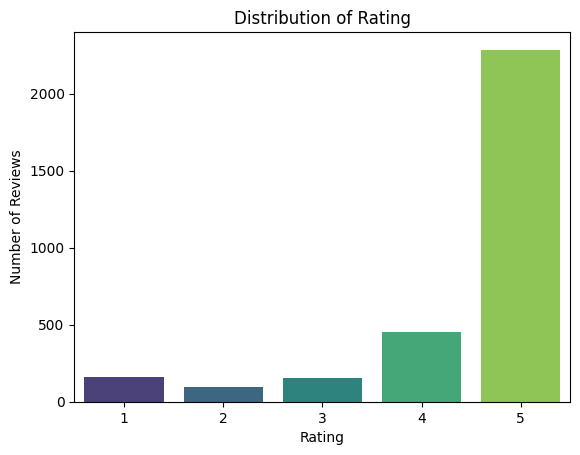

In [ ]:
# Distribution of rating
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

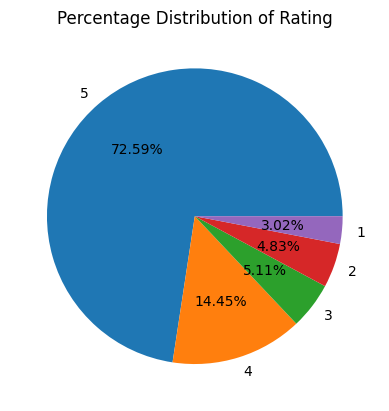

In [ ]:
# Percentage Distribution of Rating
plt.pie(df['rating'].value_counts(), labels=df['rating'].unique(), autopct='%1.2f%%')
plt.title('Percentage Distribution of Rating')
plt.show()

**Insight:**
“5-star ratings are the most frequent, showing that most customers gave highly positive feedback, as seen in the pie chart and count plot.”

***Analysis of 'feedback' and its insights***

In [ ]:
df['feedback'].value_counts()

,count
feedback,
1,2893
0,256


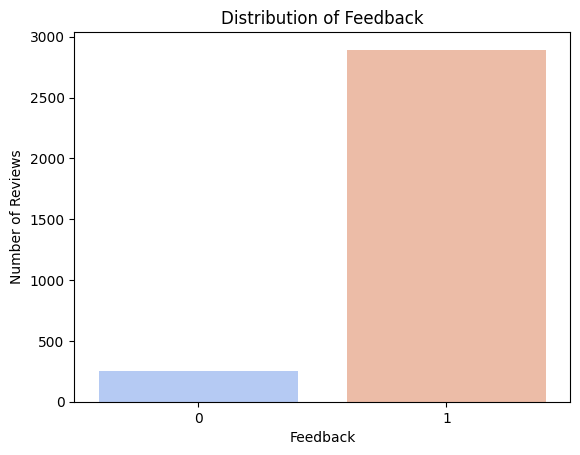

In [ ]:
# Distribution of feedback
sns.countplot(x='feedback', data=df, palette='coolwarm')
plt.title('Distribution of Feedback')
plt.xlabel('Feedback')
plt.ylabel('Number of Reviews')
plt.show()

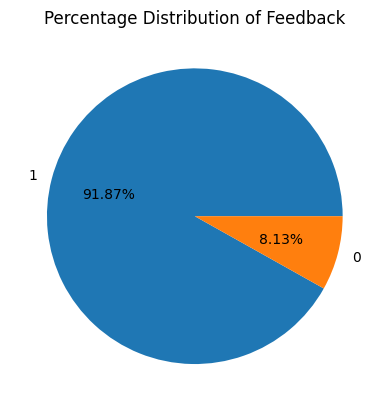

In [ ]:
# Percentage distribution of feedback
plt.pie(df['feedback'].value_counts(), labels=df['feedback'].unique(), autopct='%1.2f%%')
plt.title('Percentage Distribution of Feedback')
plt.show()

In [ ]:
df[df['feedback']==0].iloc[10]['verified_reviews'] # checking '0's randomly

'Item no longer works after just 5 months of use. Will not connect to wifi and unresponsive to reset requests.'

In [ ]:
df[df['feedback']==0]['verified_reviews'].head() # checking '0's randomly

,verified_reviews
46,"It's like Siri, in fact, Siri answers more acc..."
111,Sound is terrible if u want good music too get...
141,Not much features.
162,"Stopped working after 2 weeks ,didn't follow c..."
176,Sad joke. Worthless.


In [ ]:
df[df['feedback']==1].iloc[100]['verified_reviews'] # checking '1's randomly

'Love it!'

In [ ]:
df[df['feedback']==1]['verified_reviews'].head() # checking '1's randomly

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music


**Insights:**  
- Feedback = 1 (positive) reviews are more frequent than feedback = 0 (negative) reviews, as shown by value counts, count plot, and pie chart.  
- Random checks confirm that feedback = 1 corresponds to positive reviews, while feedback = 0 corresponds to negative reviews.


***Analysis of 'feedback'-'rating' relationship and its insights***

In [ ]:
df.groupby('feedback')['rating'].mean() # average rating for positive vs negative feedback

,rating
feedback,
0,1.371094
1,4.737643


In [ ]:
df[df['feedback']==1]['rating'].value_counts() # rating when feedback=1

,count
rating,
5,2286
4,455
3,152


In [ ]:
df[df['feedback']==1]['rating'].value_counts().sum() # Exactly matches the total number of positive feedback entries

np.int64(2893)

In [ ]:
df[df['feedback']==0]['rating'].value_counts() # rating when feedback=0

,count
rating,
1,161
2,95


In [ ]:
df[df['feedback']==0]['rating'].value_counts().sum() # Exactly matches the total number of negative feedback entries

np.int64(256)

In [ ]:
pd.crosstab(df['feedback'], df['rating'])

rating,1,2,3,4,5
feedback,,,,,
0,161,95,0,0,0
1,0,0,152,455,2286


**Insights:**  
- Positive feedback (1) has a much higher average rating than negative feedback (0).  
- Ratings 3–5 align perfectly with positive feedback, while ratings below 3 correspond to negative feedback.  
- Crosstab analysis confirms this perfect alignment between ratings and feedback.

***Analysis of review 'length' and its insights***

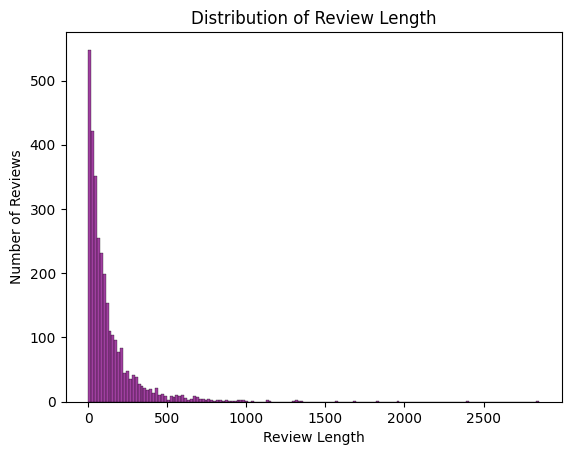

In [ ]:
# Distribution of Review Length
sns.histplot(x='length', data=df, color='purple')
plt.title("Distribution of Review Length")
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

**Insight:** “Reviews are generally short, mostly under 500 characters.”

***Analysis of review 'length'-'rating' relationship and its insights***

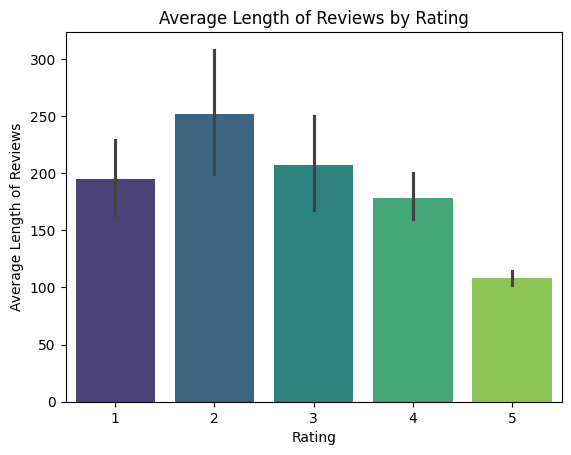

In [ ]:
# Average length of reviews for each rating
df_avg_review=df.groupby('rating')['length'].mean()
sns.barplot(x='rating', y='length', data=df, palette='viridis', order=df_avg_review.index)
plt.title("Average Length of Reviews by Rating")
plt.xlabel('Rating')
plt.ylabel('Average Length of Reviews')
plt.show()

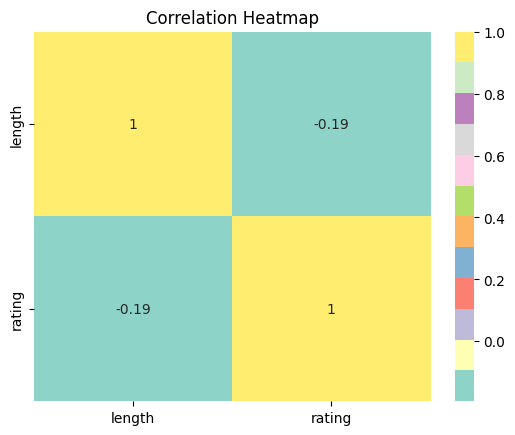

In [ ]:
sns.heatmap(df[['length','rating']].corr(), annot=True, cmap='Set3')
plt.title('Correlation Heatmap')
plt.show()

**Insight:** “Review length and rating show a weak negative correlation (-0.19), so longer reviews don’t always mean higher ratings.”

***Analysis of review 'length'-'feedback' relationship and its insights***

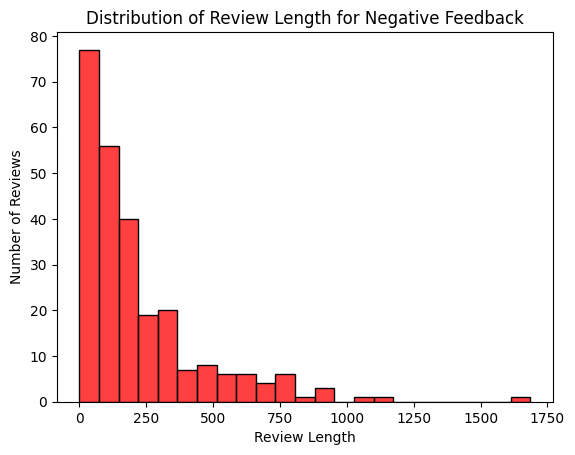

In [ ]:
# Distribution of Review Length for Negative Feedback
sns.histplot(df[df['feedback']==0]['length'], color='red')
plt.title("Distribution of Review Length for Negative Feedback")
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

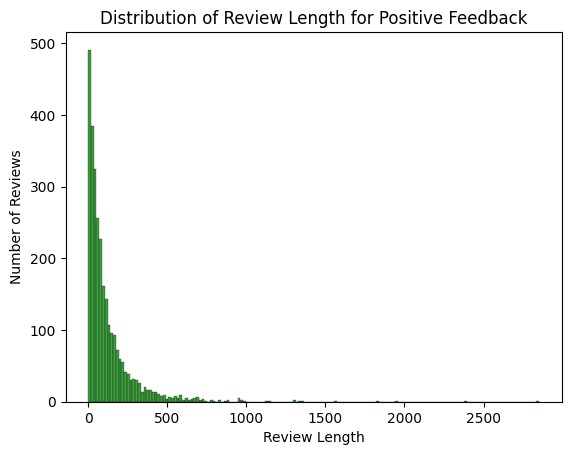

In [ ]:
# Distribution of Review Length for Positive Feedback
sns.histplot(df[df['feedback']==1]['length'], color='green')
plt.title("Distribution of Review Length for Positive Feedback")
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

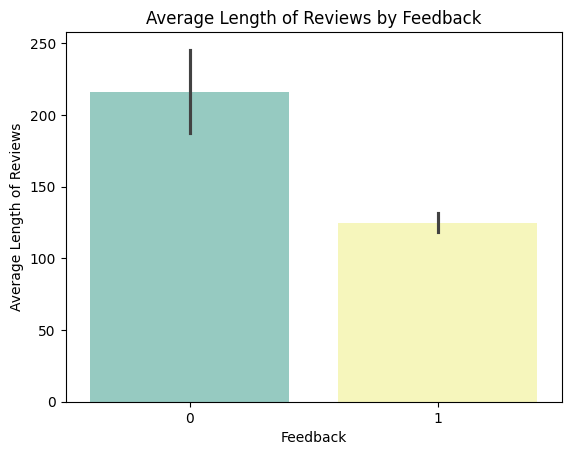

In [ ]:
# Average length of reviews for each feedback
df_avg_review_len_feedback=df.groupby('feedback')['length'].mean()
sns.barplot(x='feedback', y='length', data=df, palette='Set3', order=df_avg_review_len_feedback.index)
plt.title("Average Length of Reviews by Feedback")
plt.xlabel('Feedback')
plt.ylabel('Average Length of Reviews')
plt.show()

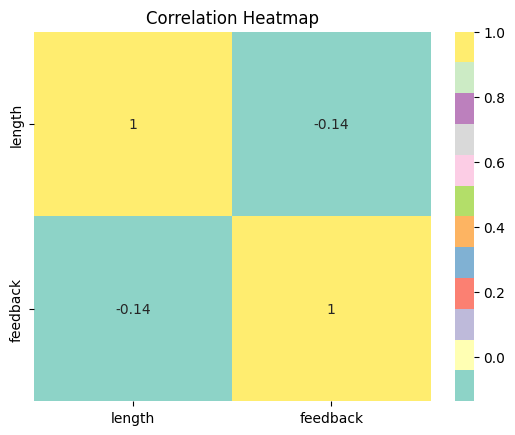

In [ ]:
sns.heatmap(df[['length','feedback']].corr(), annot=True, cmap='Set3')
plt.title('Correlation Heatmap')
plt.show()

**Insights:**  
- For both positive (1) and negative (0) feedback, the review length distribution is left-skewed, showing that most reviews are short.  
- The average review length is slightly higher for negative feedback (0) than positive feedback (1), suggesting dissatisfied customers sometimes write longer reviews.  
- Review length has a weak negative correlation (-0.14) with feedback, indicating that longer reviews are slightly more negative.

***Analysis of 'variation' and its insights***

In [ ]:
df['variation'].nunique()

16

In [ ]:
df['variation'].value_counts()

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


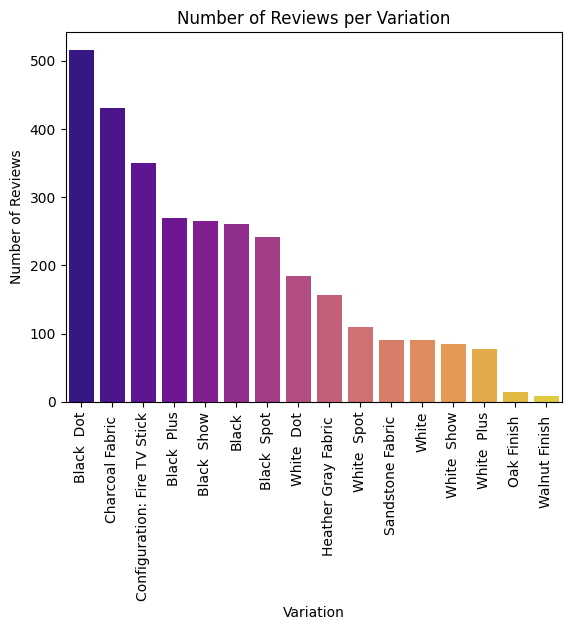

In [ ]:
# Number of Reviews per Variation
variation_counts = df['variation'].value_counts()
sns.countplot(x='variation', data=df, palette='plasma', order=variation_counts.index)
plt.title("Number of Reviews per Variation")
plt.xlabel('Variation')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

**Insight:**  
The ‘Black Dot’ variation has the highest number of reviews (516), followed by ‘Charcoal Fabric’ (430) and ‘Configuration: Fire TV Stick’ (350), indicating these are the most popular or frequently purchased variations. Variations like ‘Oak Finish’ (14) and ‘Walnut Finish’ (9) have very few reviews, suggesting lower popularity or limited sales.


***Analysis of 'variation'-'rating' relationship and its insights***

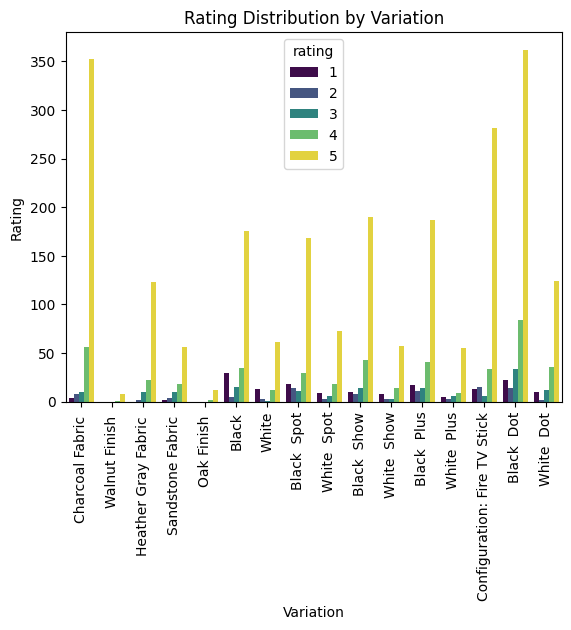

In [ ]:
# Rating Distribution by Variation
sns.countplot(x='variation', hue='rating', data=df, palette='viridis')
plt.title("Rating Distribution by Variation")
plt.xlabel('Variation')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

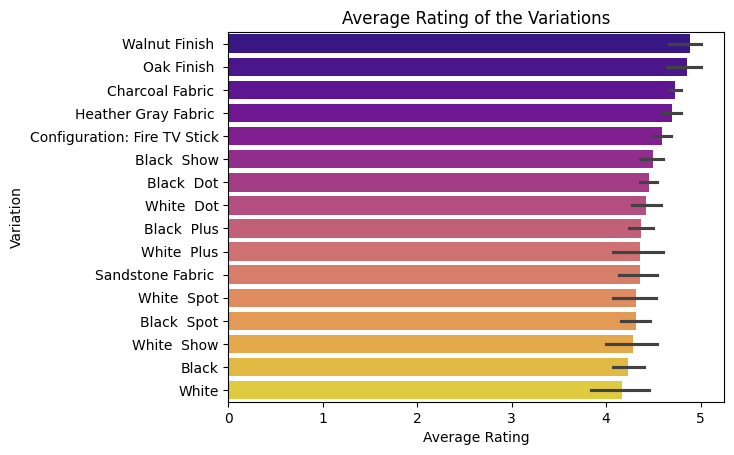

In [ ]:
# Average Rating of the Variations
df_variations=df.groupby('variation')['rating'].mean().sort_values(ascending=False)
sns.barplot(y='variation', x='rating', data=df, palette='plasma', order=df_variations.index)
plt.title("Average Rating of the Variations")
plt.xlabel('Average Rating')
plt.ylabel('Variation')
plt.show()

**Insights:**  
- For all variations, 5-star ratings are the most frequent, showing that customers generally provide positive feedback across products.  
- The average rating is highest for ‘Walnut Finish’, ‘Oak Finish’, and ‘Charcoal Fabric’. However, note that ‘Walnut Finish’ and ‘Oak Finish’ have very few reviews, so their high average rating may not be as reliable as for variations with more reviews.

***Analysis of 'variation'-'feedback' relationship and its insights***

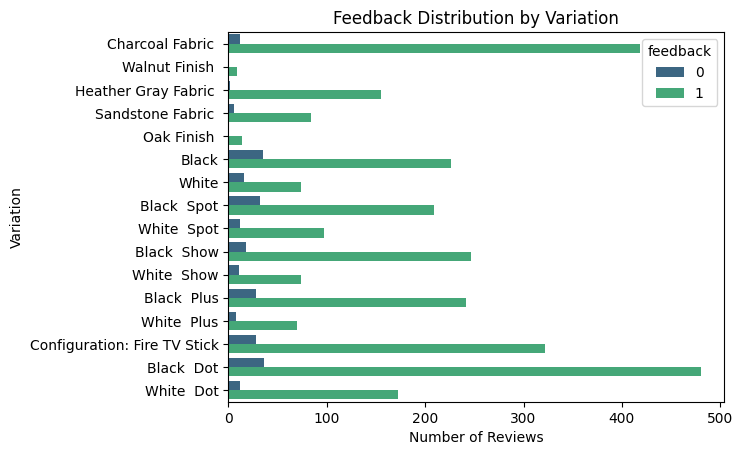

In [ ]:
# Feedback Distribution by Variation
sns.countplot(y='variation', hue='feedback', data=df, palette='viridis')
plt.title("Feedback Distribution by Variation")
plt.xlabel('Number of Reviews')
plt.ylabel('Variation')
plt.show()

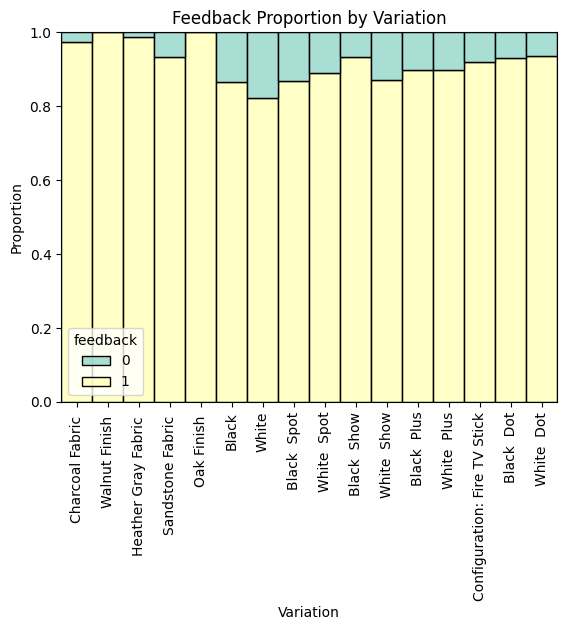

In [ ]:
# Feedback Proportion by Variation
sns.histplot(x='variation', hue='feedback', data=df, multiple='fill', palette='Set3')
plt.title("Feedback Proportion by Variation")
plt.xlabel('Variation')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.show()

**Insight:**  
All product variations have more positive (feedback = 1) reviews than negative (feedback = 0) reviews, indicating overall customer satisfaction across all variations.

***Analysis of 'variation'-'length' relationship and its insights***

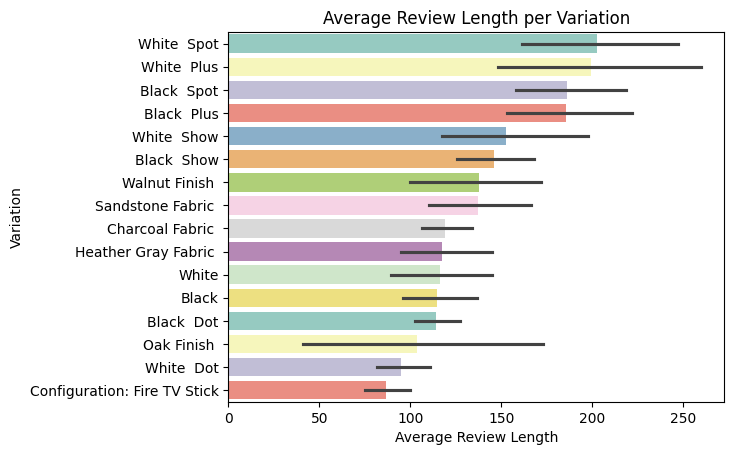

In [ ]:
# Average review length per variation
df_avg_review_len=df.groupby('variation')['length'].mean().sort_values(ascending=False)
sns.barplot(y='variation', x='length', data=df, palette='Set3', order=df_avg_review_len.index)
plt.title("Average Review Length per Variation")
plt.xlabel('Average Review Length')
plt.ylabel('Variation')
plt.show()

**Insight:**  
- The ‘White Spot’ and ‘White Plus’ variations have longer average review lengths, suggesting that customers tend to provide more detailed feedback for these products, even though the total number of reviews for these variations is relatively low.  
- The ‘Configuration: Fire TV Stick’ variation has a high number of reviews and also a high proportion of positive feedback (feedback = 1), indicating strong overall customer satisfaction.  
- In contrast, variations with shorter average review lengths, like ‘Configuration: Fire TV Stick’, still maintain a high positive feedback ratio, showing that review length does not necessarily correlate with customer satisfaction.


***Analysis of 'date' and its insights***

In [ ]:
import datetime
today=datetime.date.today()
today=pd.to_datetime(today,format='%Y-%M-%d')
print(today)

2025-09-30 00:00:00


In [ ]:
df.loc[df['date']>today] # there are no future misleading dates

,rating,date,variation,verified_reviews,feedback,length


***Analysing and Preprocessing 'verified_reviews'***

In [ ]:
df['verified_reviews'].head()

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music


In [ ]:
df['verified_reviews'].iloc[[60, 2252, 590, 1557, 1691, 2043, 2090]] #first randomly checking some of the reviews before preprocessing

,verified_reviews
60,😍
2252,⭐⭐⭐⭐⭐
590,A++++
1557,
1691,👍🏻
2043,"Love, Love, Love my Amazon Echo Plus!!❤️❤️"
2090,"This is a great tool (toy?), room-filling musi..."


**Insight:**
Random inspection shows noisy entries (emojis 😍, 👍🏻, punctuations, special characters, numbers, empty reviews) alongside meaningful reviews like “Love, Love, Love my Amazon Echo Plus!!❤️❤️” and “This is a great tool (toy?), room-filling music...”. **Proper preprocessing is needed to retain valuable reviews** while filtering out noise.

*Demojize*

In [ ]:
import emoji
df['verified_reviews'] = df['verified_reviews'].apply(emoji.demojize) # converting emojis in the text into their text description

df['verified_reviews'].iloc[[60, 2252, 590, 1557, 1691, 2043, 2090]] # first randomly checking the reviews after demojizing

,verified_reviews
60,:smiling_face_with_heart-eyes:
2252,:star::star::star::star::star:
590,A++++
1557,
1691,:thumbs_up_light_skin_tone:
2043,"Love, Love, Love my Amazon Echo Plus!!:red_hea..."
2090,"This is a great tool (toy?), room-filling musi..."


*Lowercasing & Removing (URLs/Mentions, Punctuations, Special Characters, Digits & extra Spaces)*

In [ ]:
df['verified_reviews'] = df['verified_reviews'].str.lower()  # converting all text to lowercase
df['verified_reviews'] = df['verified_reviews'].str.replace(r"http\S+|www\S+|https\S+", "", regex=True)  # removing URLs
df['verified_reviews'] = df['verified_reviews'].str.replace(r"@\w+|\#", "", regex=True)  # removing mentions (@user) and hashtags (#tag)
df['verified_reviews'] = df['verified_reviews'].str.replace(r"_", " ", regex=True)  # underscores to space
df['verified_reviews'] = df['verified_reviews'].str.replace(r":", " ", regex=True) # colon to space
df['verified_reviews'] = df['verified_reviews'].str.replace(r"[^\w\s]", "", regex=True)  # removing punctuation, special characters
df['verified_reviews'] = df['verified_reviews'].str.replace(r"\d+", "", regex=True) #removing digits
df['verified_reviews'] = df['verified_reviews'].str.replace(r"\s+", " ", regex=True).str.strip()  # removing extra whitespaces and leading/trailing spaces

df['verified_reviews'].iloc[[60, 2252, 590, 1557, 1691, 2043, 2090]] # checking the reviews after preprocessing

,verified_reviews
60,smiling face with hearteyes
2252,star star star star star
590,a
1557,
1691,thumbs up light skin tone
2043,love love love my amazon echo plus red heart r...
2090,this is a great tool toy roomfilling music ver...


In [ ]:
df.isnull().sum() # checking the missing values

,0
rating,0
date,0
variation,0
verified_reviews,0
feedback,0
length,0


In [ ]:
df.shape

(3149, 6)

**Insight:**
Although verified_reviews shows 0 missing values (NaN), some entries are empty strings or contain only spaces. These are **not detected by isnull()**, so they need to be explicitly removed to ensure only meaningful reviews are used for analysis and modeling.

*Removing empty reviews*

In [ ]:
(df['verified_reviews'].str.strip() == "").sum() #checking for empty strings

np.int64(80)

In [ ]:
df = df[df['verified_reviews'].str.strip()!=""] #removing empty reviews
df.reset_index(drop=True, inplace=True) #resetting index after removing empty reviews

In [ ]:
df.shape # after removing empty reviews

(3069, 6)

In [ ]:
df['verified_reviews'].iloc[[60, 2252, 590]] #checking the reviews after removing empty reviews

,verified_reviews
60,smiling face with hearteyes
2252,had to return it as hulu does not work on devi...
590,perfect could not tell the difference from a n...


*Tokenization*

In [ ]:
df['verified_reviews'] = df['verified_reviews'].apply(word_tokenize) # tokenization
df['verified_reviews'].iloc[[60, 2252, 590]] #randomly checking the reviews after tokenization

,verified_reviews
60,"[smiling, face, with, hearteyes]"
2252,"[had, to, return, it, as, hulu, does, not, wor..."
590,"[perfect, could, not, tell, the, difference, f..."


*Spell Checking*

In [ ]:
spell = SpellChecker()
def spell_check(tokens):
  result = []
  for word in tokens:
    if word in spell:
      result.append(word)
    else:
      result.append(spell.correction(word))
  return result
df['verified_reviews']=df['verified_reviews'].apply(spell_check) #spell checking

In [ ]:
df['verified_reviews'].iloc[[60, 2252, 590]] #randomly checking the review after spell checking

*Stopword Removal*

In [ ]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]
df['verified_reviews']=df['verified_reviews'].apply(remove_stopwords)
df['verified_reviews'].iloc[[60, 2252, 590]] #checking the reviews after stopwords removal

*Lemmatization*

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
  tokens = [token for token in tokens if token is not None] # Filter out any None values from the tokens list
  return [lemmatizer.lemmatize(word) for word in tokens]
df['verified_reviews'] = df['verified_reviews'].apply(lemmatize_tokens)
df['verified_reviews'].iloc[[60, 2252, 590]] #checking the reviews after lemmatization

In [ ]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: ' '.join(x))
df

In [ ]:
(df['verified_reviews'].str.strip() == "").sum() #checking empty reviews

In [ ]:
df = df[df['verified_reviews'].str.strip()!=""] #removing empty reviews
df.reset_index(drop=True, inplace=True) #resetting index after removing empty reviews

In [ ]:
df.shape # after removing empty reviews

**Saving after preprocessing**

In [ ]:
df.to_csv("/content/drive/My Drive/cleaned_amazon_alexa.tsv", sep='\t', index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cleaned_amazon_alexa.tsv', sep='\t') #loading the data - tsv file
df

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,love echo,1,13
1,5,2018-07-31,Charcoal Fabric,loved,1,9
2,4,2018-07-31,Walnut Finish,sometimes playing game answer question correct...,1,195
3,5,2018-07-31,Charcoal Fabric,lot fun thing old learns dinosaur control ligh...,1,172
4,5,2018-07-31,Charcoal Fabric,music,1,5
...,...,...,...,...,...,...
3060,5,2018-07-30,Black Dot,perfect kid adult everyone,1,50
3061,5,2018-07-30,Black Dot,listening music searching location checking ti...,1,135
3062,5,2018-07-30,Black Dot,love thing running entire home light thermosta...,1,441
3063,5,2018-07-30,White Dot,complaint sound quality great mostly use comma...,1,380


In [ ]:
df.isnull().sum() #checking the cleaned dataset once again

,0
rating,0
date,0
variation,0
verified_reviews,0
feedback,0
length,0


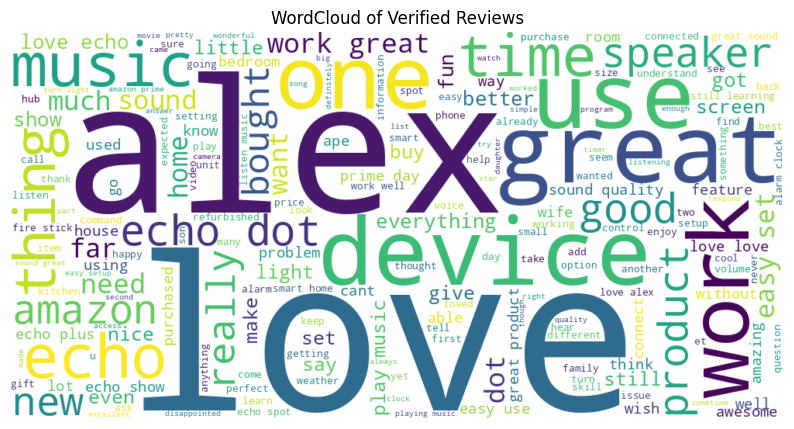

In [ ]:
#WordCloud for All Reviews
from wordcloud import WordCloud
all_reviews = " ".join(df['verified_reviews'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_reviews)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Verified Reviews")
plt.show()

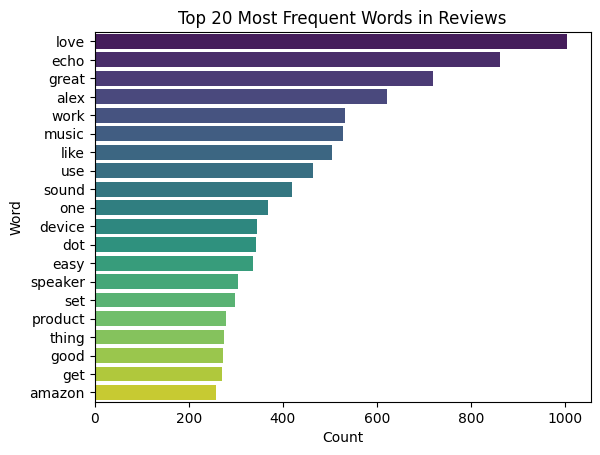

In [ ]:
#Top 20 Most Frequent Words in Reviews
from collections import Counter
all_words = " ".join(df['verified_reviews']).split()
common_words = Counter(all_words).most_common(20)
common_df = pd.DataFrame(common_words, columns=['Word','Count'])
sns.barplot(x='Count', y='Word', data=common_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title("Top 20 Most Frequent Words in Reviews")
plt.show()

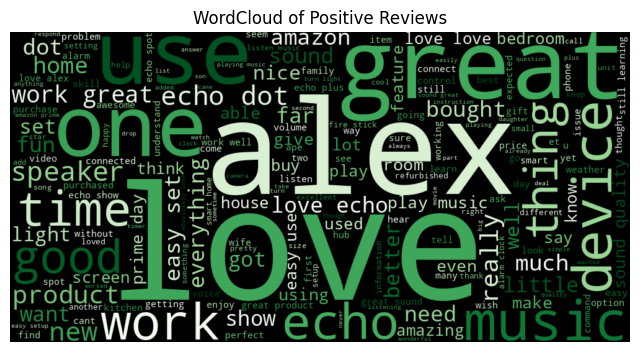

In [ ]:
# Positive reviews
positive_reviews = " ".join(df[df['feedback'] == 1]['verified_reviews'])
wordcloud_pos = WordCloud(width=1000, height=500, background_color='black', colormap='Greens').generate(positive_reviews)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Positive Reviews")
plt.show()

**Insight:** We can see the words like love, great, amazing, perfect, enjoy etc. in positive reviews

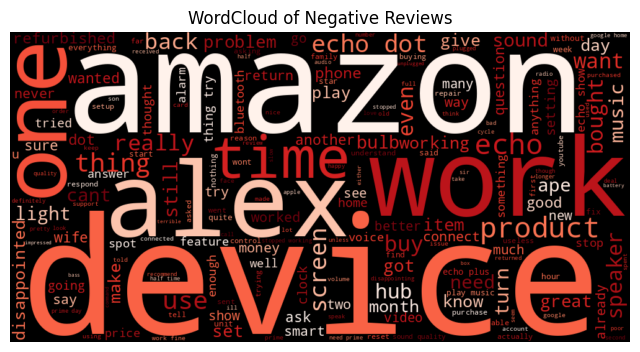

In [ ]:
# Negative reviews
negative_reviews = " ".join(df[df['feedback'] == 0]['verified_reviews'])
wordcloud_neg = WordCloud(width=1000, height=500, background_color='black', colormap="Reds").generate(negative_reviews)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Negative Reviews")
plt.show()

**Insight:** We can see the words like disappointed, problem, refurnished etc. in negative reviews

After cleaning, preprocessing and analysing the reviews, the data is now ready to be converted into numerical features and used for model building.

**Vectorization**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['verified_reviews'])
y = df['feedback']

In [ ]:
df['feedback'].value_counts()

,count
feedback,
1,2829
0,236


Our target variable feedback is imbalanced:

Majority class: Positive reviews (1)

Minority class: Negative reviews (0)

We will use SMOTE on the training set to synthetically balance the classes.

**Note:** The test set remains imbalanced to reflect real-world distribution, so evaluation metrics for class 0 are crucial.

# **Machine Learning (ML) Models - Training and Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

def evaluate_models_smote(X, y, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    smote = SMOTE(random_state=random_state)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train) #smote is applied only on training data not on testing data

    models = {"Logistic Regression": LogisticRegression(max_iter=1000),
              "Decision Tree": DecisionTreeClassifier(random_state=random_state),
              "Random Forest": RandomForestClassifier(n_estimators=200, random_state=random_state),
              "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=random_state),
              "Multinomial NB": MultinomialNB(),
              "Gaussian NB": GaussianNB(),
              "Linear SVC": LinearSVC(max_iter=5000),
              "SVC": SVC(probability=True),
              "KNN": KNeighborsClassifier()}


    for name, model in models.items():
        print(f"\n======== {name} ========")

        if name == "Gaussian NB":         # GaussianNB requires dense input
            model.fit(X_train_res.toarray(), y_train_res)
            y_pred_train = model.predict(X_train_res.toarray())
            y_pred_test = model.predict(X_test.toarray())
        else:
            model.fit(X_train_res, y_train_res)
            y_pred_train = model.predict(X_train_res)
            y_pred_test = model.predict(X_test)

        train_acc = accuracy_score(y_train_res, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)
        balanced_accuracy= balanced_accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        try:
            auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        except:
            auc = np.nan
        cm = confusion_matrix(y_test, y_pred_test)

        print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f} | Balanced Accuracy: {balanced_accuracy:.4f}" )
        print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f} | AUC-ROC: {auc:.4f}")
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred_test, digits=4))

        if train_acc - test_acc > 0.05:         # Overfitting/underfitting check
            print("⚠️ Warning: Model may be overfitting.")
        elif test_acc - train_acc > 0.05:
            print("⚠️ Warning: Model may be underfitting.")
        else:
            print("✅ Model generalizes well.")

evaluate_models_smote(X, y) # Run evaluation


======== Logistic Regression ========
Train Accuracy: 0.9848 | Test Accuracy: 0.9380 | Balanced Accuracy: 0.8494
Precision: 0.9783 | Recall: 0.9541 | F1: 0.9660 | AUC-ROC: 0.9454
Confusion Matrix:
 [[ 35  12]
 [ 26 540]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5738    0.7447    0.6481        47
           1     0.9783    0.9541    0.9660       566

    accuracy                         0.9380       613
   macro avg     0.7760    0.8494    0.8071       613
weighted avg     0.9472    0.9380    0.9416       613

✅ Model generalizes well.

======== Decision Tree ========
Train Accuracy: 0.9998 | Test Accuracy: 0.9038 | Balanced Accuracy: 0.7040
Precision: 0.9551 | Recall: 0.9399 | F1: 0.9475 | AUC-ROC: 0.7040
Confusion Matrix:
 [[ 22  25]
 [ 34 532]]
Classification Report:
               precision    recall  f1-score   support

           0     0.3929    0.4681    0.4272        47
           1     0.9551    0.9399    0.9475       56

**Insight:** Both **Logistic Regression** and **XGBoost** outperformed other models, achieving **higher balanced accuracy, F1-score, and AUC-ROC,** demonstrating strong generalization and class balance. They are ideal models for hyperparameter tuning.

**Hyperparameter tuning and evaluation**

In [ ]:
#Tuning Logistic Regression
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) #smote is applied only on training data not on testing data
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='balanced_accuracy')
grid.fit(X_train_res, y_train_res)
print(grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nClassification Matrix:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Balanced Accuracy: 0.7837380648071574

Classification Matrix:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62        47
           1       0.97      0.97      0.97       566

    accuracy                           0.94       613
   macro avg       0.80      0.78      0.79       613
weighted avg       0.94      0.94      0.94       613


Confusion Matrix:
 [[ 28  19]
 [ 16 550]]


**Observation:**

Tuning increased precision slightly for minority class, but **recall and balanced accuracy decreased.**

Logistic Regression is biased toward the majority class (class 1).

**Overall, tuning did not improve minority class handling.**

In [ ]:
#Tuning XGBoost
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) #smote is applied only on training data not on testing data
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 500]}
grid = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False), param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid.fit(X_train_res, y_train_res)
print(grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nClassification Matrix:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500}
Balanced Accuracy: 0.826291256296519

Classification Matrix:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67        47
           1       0.97      0.97      0.97       566

    accuracy                           0.95       613
   macro avg       0.82      0.83      0.82       613
weighted avg       0.95      0.95      0.95       613


Confusion Matrix:
 [[ 32  15]
 [ 16 550]]


**Observation:**

Tuning improved balanced accuracy, precision, recall, and F1 slightly for the minority class.

XGBoost handles imbalanced data better than Logistic Regression.

**Overall, tuning provided a marginal but consistent improvement for both classes.**

# **Fine-tuning Pretrained Models and its Evaluation**

Raw data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/amazon_alexa.tsv', sep='\t') #loading the raw data - tsv file
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(3149, 5)

DistilBERT (without tuning)

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from tqdm import tqdm

df['verified_reviews'] = df['verified_reviews'].astype(str)
df['feedback'] = df['feedback'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(df['verified_reviews'], df['feedback'], test_size=0.2, random_state=42, stratify=df['feedback'])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
model.to(device)
model.eval()

encodings = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

input_ids = encodings["input_ids"].to(device)
attention_mask = encodings["attention_mask"].to(device)
y_true = np.array(y_test.tolist())

batch_size = 16
preds = []

with torch.no_grad():
    for i in tqdm(range(0, len(input_ids), batch_size)):
        batch_input_ids = input_ids[i:i+batch_size]
        batch_attention_mask = attention_mask[i:i+batch_size]

        outputs = model(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_mask
        )

        batch_preds = torch.argmax(outputs.logits, dim=1)
        preds.extend(batch_preds.cpu().numpy())

preds = np.array(preds)

print("Accuracy:", accuracy_score(y_true, preds))
print("Balanced Accuracy:", balanced_accuracy_score(y_true, preds))

print("\nClassification Report:\n")
print(classification_report(y_true, preds, digits=4))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_true, preds))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 40/40 [00:02<00:00, 17.97it/s]


Accuracy: 0.08095238095238096
Balanced Accuracy: 0.5

Classification Report:

              precision    recall  f1-score   support

           0     0.0810    1.0000    0.1498        51
           1     0.0000    0.0000    0.0000       579

    accuracy                         0.0810       630
   macro avg     0.0405    0.5000    0.0749       630
weighted avg     0.0066    0.0810    0.0121       630


Confusion Matrix:

[[ 51   0]
 [579   0]]


**Observations:**

The model predicted only the negative class (0) for all test samples.

Recall for the positive class is 0%, meaning the model failed to identify even a single positive customer review.

The dataset is highly imbalanced (51 negatives vs 579 positives), causing the pretrained DistilBERT model to collapse into a majority-class predictor.

The balanced accuracy of 50% confirms the model performs no better than random guessing for a binary classifier.

***The model was evaluated without task-specific fine-tuning, so it lacked domain understanding of customer feedback sentiment.***


DistilBERT (fine tuning)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import torch
from transformers import (DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback)
from datasets import Dataset

df['verified_reviews'] = df['verified_reviews'].astype(str)
df['feedback'] = df['feedback'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(df['verified_reviews'], df['feedback'], test_size=0.2, random_state=42, stratify=df['feedback'])

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize(batch):
    return tokenizer(batch, padding='max_length', truncation=True, max_length=128)

train_dataset = Dataset.from_dict({'text': X_train.tolist(), 'label': y_train.tolist()})
test_dataset  = Dataset.from_dict({'text': X_test.tolist(),  'label': y_test.tolist()})

train_dataset = train_dataset.map(lambda examples: tokenize(examples['text']), batched=True)
test_dataset  = test_dataset.map(lambda examples: tokenize(examples['text']), batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

def compute_metrics(pred):
    labels = pred.label_ids
    preds  = np.argmax(pred.predictions, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "balanced_accuracy": balanced_accuracy_score(labels, preds),
        "precision": precision_score(labels, preds),
        "recall": recall_score(labels, preds),
        "f1": f1_score(labels, preds)
    }

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()

eval_results = trainer.evaluate()
print(eval_results)

pred_output = trainer.predict(test_dataset)
preds = np.argmax(pred_output.predictions, axis=1)

print("Accuracy:", accuracy_score(y_test, preds))
print("\nBalanced Accuracy:", balanced_accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))

Map:   0%|          | 0/2519 [00:00<?, ? examples/s]

Map:   0%|          | 0/630 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Balanced Accuracy,Precision,Recall,F1
1,0.186000,0.134905,0.944444,0.692624,0.948845,0.993092,0.970464
2,0.095500,0.134678,0.953968,0.814030,0.969283,0.981002,0.975107
3,0.045000,0.139040,0.958730,0.816621,0.969440,0.986183,0.977740


{'eval_loss': 0.13904035091400146, 'eval_accuracy': 0.9587301587301588, 'eval_balanced_accuracy': 0.8166209488976939, 'eval_precision': 0.969439728353141, 'eval_recall': 0.9861830742659758, 'eval_f1': 0.9777397260273972, 'eval_runtime': 0.8415, 'eval_samples_per_second': 748.661, 'eval_steps_per_second': 93.88, 'epoch': 3.0}
Accuracy: 0.9587301587301588

Balanced Accuracy: 0.8166209488976939

Classification Report:
               precision    recall  f1-score   support

           0     0.8049    0.6471    0.7174        51
           1     0.9694    0.9862    0.9777       579

    accuracy                         0.9587       630
   macro avg     0.8872    0.8166    0.8476       630
weighted avg     0.9561    0.9587    0.9567       630


Confusion Matrix:
 [[ 33  18]
 [  8 571]]


**Observations:**

Fine-tuning DistilBERT improved accuracy from 8.09% (baseline) to 95.87%, clearly demonstrating the impact of task-specific training.

The Balanced Accuracy of 81.66% indicates strong performance across both majority and minority classes despite heavy dataset imbalance.

Recall of 98.62% shows the model captures almost all positive customer feedback, minimizing missed satisfaction signals.

High Precision (96.94%) confirms that positive predictions are highly reliable.

BERT (without tuning)

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification
from tqdm import tqdm

df['verified_reviews'] = df['verified_reviews'].astype(str)
df['feedback'] = df['feedback'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(df['verified_reviews'], df['feedback'], test_size=0.2, random_state=42, stratify=df['feedback'])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)
model.eval()

encodings = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

input_ids = encodings["input_ids"].to(device)
attention_mask = encodings["attention_mask"].to(device)
y_true = np.array(y_test.tolist())

batch_size = 16
preds = []

with torch.no_grad():
    for i in tqdm(range(0, len(input_ids), batch_size)):
        batch_input_ids = input_ids[i:i+batch_size]
        batch_attention_mask = attention_mask[i:i+batch_size]

        outputs = model(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_mask
        )

        batch_preds = torch.argmax(outputs.logits, dim=1)
        preds.extend(batch_preds.cpu().numpy())

preds = np.array(preds)

print("Accuracy:", accuracy_score(y_true, preds))
print("Balanced Accuracy:", balanced_accuracy_score(y_true, preds))
print("\nClassification Report:\n")
print(classification_report(y_true, preds, digits=4))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_true, preds))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 40/40 [00:04<00:00,  8.93it/s]

Accuracy: 0.919047619047619
Balanced Accuracy: 0.5

Classification Report:

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        51
           1     0.9190    1.0000    0.9578       579

    accuracy                         0.9190       630
   macro avg     0.4595    0.5000    0.4789       630
weighted avg     0.8446    0.9190    0.8803       630


Confusion Matrix:

[[  0  51]
 [  0 579]]


**Observations:**

The model predicted only the positive class (1) for every test sample.

Recall for the negative class is 0%, meaning the model failed to identify a single dissatisfied customer.

The dataset is highly imbalanced (51 negative vs 579 positive reviews), causing the model to behave as a majority-class classifier.

Despite high accuracy, the balanced accuracy of 50% reveals that the model performs no better than random guessing when class imbalance is considered.

BERT (fine tuning)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score, f1_score)
import torch
from transformers import (BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, BertConfig)
from datasets import Dataset

df['verified_reviews'] = df['verified_reviews'].astype(str)
df['feedback'] = df['feedback'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(df['verified_reviews'], df['feedback'], test_size=0.2, random_state=42, stratify=df['feedback'])

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize(batch):
    return tokenizer(batch, padding='max_length', truncation=True, max_length=128)

train_dataset = Dataset.from_dict({'text': X_train.tolist(), 'label': y_train.tolist()})
test_dataset  = Dataset.from_dict({'text': X_test.tolist(),  'label': y_test.tolist()})

train_dataset = train_dataset.map(lambda examples: tokenize(examples['text']), batched=True)
test_dataset  = test_dataset.map(lambda examples: tokenize(examples['text']), batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

config = BertConfig.from_pretrained('bert-base-uncased', num_labels=2, hidden_dropout_prob=0.3, attention_probs_dropout_prob=0.3)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    return {
        "accuracy": (labels == preds).mean(),
        "balanced_accuracy": balanced_accuracy_score(labels, preds),
        "precision": precision_score(labels, preds),
        "recall": recall_score(labels, preds),
        "f1": f1_score(labels, preds)
    }

training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=3e-5,
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.05,
    warmup_ratio=0.1,
    logging_dir='./logs',
    logging_steps=50,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()

eval_results = trainer.evaluate()
print(eval_results)

pred_output = trainer.predict(test_dataset)
preds = np.argmax(pred_output.predictions, axis=1)

print("Accuracy:", accuracy_score(y_test, preds))
print("\nBalanced Accuracy:", balanced_accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))

Map:   0%|          | 0/2519 [00:00<?, ? examples/s]

Map:   0%|          | 0/630 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Balanced Accuracy,Precision,Recall,F1
1,0.258900,0.251518,0.919048,0.500000,0.919048,1.000000,0.957816
2,0.171600,0.182247,0.952381,0.795286,0.966044,0.982729,0.974315
3,0.134500,0.176611,0.950794,0.857005,0.977352,0.968912,0.973114
4,0.098500,0.181713,0.961905,0.871990,0.979275,0.979275,0.979275


{'eval_loss': 0.18171268701553345, 'eval_accuracy': 0.9619047619047619, 'eval_balanced_accuracy': 0.8719902468759524, 'eval_precision': 0.9792746113989638, 'eval_recall': 0.9792746113989638, 'eval_f1': 0.9792746113989638, 'eval_runtime': 1.5625, 'eval_samples_per_second': 403.204, 'eval_steps_per_second': 50.56, 'epoch': 4.0}
Accuracy: 0.9619047619047619

Balanced Accuracy: 0.8719902468759524

Classification Report:
               precision    recall  f1-score   support

           0     0.7647    0.7647    0.7647        51
           1     0.9793    0.9793    0.9793       579

    accuracy                         0.9619       630
   macro avg     0.8720    0.8720    0.8720       630
weighted avg     0.9619    0.9619    0.9619       630


Confusion Matrix:
 [[ 39  12]
 [ 12 567]]


**Observations:**

The original BERT model predicted only positive reviews and completely failed to detect negative feedback. Although accuracy looked high, the balanced accuracy was only 50%, showing the model was biased.

After fine-tuning, BERT started identifying negative reviews correctly.

Fine-tuned BERT achieved 96% accuracy & 87% balanced accuracy with a strong F1-score of 97%.

The number of wrongly classified negative reviews reduced drastically after training.

In [ ]:
save_path = "bert_review_model"
trainer.model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

('bert_review_model/tokenizer_config.json',
 'bert_review_model/special_tokens_map.json',
 'bert_review_model/vocab.txt',
 'bert_review_model/added_tokens.json')

In [ ]:
from google.colab import files
import shutil
shutil.make_archive("bert_review_model", "zip", "bert_review_model")
files.download("bert_review_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**TESTING** - bert_review_model

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

model_path = "bert_review_model"

tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("BERT Model loaded successfully 🚀")

def predict_review(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()

    return "Positive 😊" if pred == 1 else "Negative 😞"

BERT Model loaded successfully 🚀


In [ ]:
samples = ["Very good product.",
    "Terrible quality. I hate it.",
    "The phone works fine but battery drains quickly.",
    "Delivery was late but the product is decent.",
    "At first I liked it, but after a week it completely stopped working.",
    "The design is attractive, although the performance is disappointing.",
    "Support team tried to help but the issue still remains unresolved.",
    "Despite minor flaws, the overall experience exceeded my expectations."]

for s in samples:
    print(f"\nReview: {s}")
    print("Prediction →", predict_review(s))


Review: Very good product.
Prediction → Positive 😊

Review: Terrible quality. I hate it.
Prediction → Negative 😞

Review: The phone works fine but battery drains quickly.
Prediction → Negative 😞

Review: Delivery was late but the product is decent.
Prediction → Positive 😊

Review: At first I liked it, but after a week it completely stopped working.
Prediction → Negative 😞

Review: The design is attractive, although the performance is disappointing.
Prediction → Positive 😊

Review: Support team tried to help but the issue still remains unresolved.
Prediction → Negative 😞

Review: Despite minor flaws, the overall experience exceeded my expectations.
Prediction → Positive 😊


**Deploying a Fine-Tuned BERT Transformer Model for Enterprise-Grade Customer Sentiment Intelligence with 96% Accuracy and Balanced Performance Across Classes.**

In [ ]:
!pip install --upgrade transformers huggingface_hub

  Using cached huggingface_hub-1.2.3-py3-none-any.whl.metadata (13 kB)


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from huggingface_hub import HfApi

username = "PREETHI0103"
repo_name = "customer-feedback-sentiment-analyser"

api = HfApi()
api.create_repo(
    repo_id=f"{username}/{repo_name}",
    repo_type="model",
    exist_ok=True
)

RepoUrl('https://huggingface.co/PREETHI0103/customer-feedback-sentiment-analyser', endpoint='https://huggingface.co', repo_type='model', repo_id='PREETHI0103/customer-feedback-sentiment-analyser')

In [ ]:
from huggingface_hub import upload_folder

upload_folder(
    folder_path="bert_review_model",
    repo_id="PREETHI0103/customer-feedback-sentiment-analyser",
    repo_type="model",
    commit_message="Upload trained BERT sentiment model"
)

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...w_model/model.safetensors:   6%|5         | 25.2MB /  438MB            

CommitInfo(commit_url='https://huggingface.co/PREETHI0103/customer-feedback-sentiment-analyser/commit/b0ed8a127069d0b4e2b61859f3c16b74f49d8a54', commit_message='Upload trained BERT sentiment model', commit_description='', oid='b0ed8a127069d0b4e2b61859f3c16b74f49d8a54', pr_url=None, repo_url=RepoUrl('https://huggingface.co/PREETHI0103/customer-feedback-sentiment-analyser', endpoint='https://huggingface.co', repo_type='model', repo_id='PREETHI0103/customer-feedback-sentiment-analyser'), pr_revision=None, pr_num=None)

**Observation:**
“When I evaluated pretrained BERT without fine-tuning, the model collapsed to predicting only the majority class, resulting in 0 recall for the minority class and a balanced accuracy of 0.5.
This happens because the classification head is randomly initialized and has no domain knowledge.”

**Streamlit**

In [ ]:
%pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import torch
from transformers import BertTokenizer, BertForSequenceClassification

@st.cache_resource
def load_model():
    tokenizer = BertTokenizer.from_pretrained("PREETHI0103/customer-feedback-sentiment-analyser")
    model = BertForSequenceClassification.from_pretrained("PREETHI0103/customer-feedback-sentiment-analyser")
    model.eval()
    return tokenizer, model

tokenizer, model = load_model()

st.set_page_config(page_title="AI Customer Sentiment Intelligence Platform", page_icon="📊", layout="centered")

st.markdown("""
<style>
/* Background */
.main {background-color: #0f172a; color: #e5e7eb; font-family: 'Segoe UI', sans-serif;}
/* Headings */
h1 {color:#38bdf8; text-align:center; font-size:2.5rem; font-weight:bold;}
h2 {color:#facc15; text-align:center; font-size:1.5rem;}
/* Subtitle */
.subtitle {text-align:center; color:#e5e7eb; font-size:1.1rem; margin-bottom:30px;}
/* Text area */
textarea {border-radius:12px; background-color:#1e293b; color:#e5e7eb; padding:10px; font-size:1rem;}
/* Buttons */
.stButton>button {background-color:#38bdf8; color:#0f172a; font-weight:bold; border-radius:12px; padding:10px 25px;}
.stButton>button:hover {background-color:#22d3ee; color:#0f172a;}
/* Instructions box */
.instruction-box {background-color:#1e293b; padding:15px; border-radius:12px; margin-bottom:20px; color:#e5e7eb;}
</style>
""", unsafe_allow_html=True)

st.markdown("<h1>📊 AI Customer Sentiment Intelligence Platform</h1>", unsafe_allow_html=True)
st.markdown("<p class='subtitle'>Turning Customer Feedback into Actionable Insights using AI</p>", unsafe_allow_html=True)
st.divider()

st.markdown("""
<div class='instruction-box'>
<b>Instructions:</b>
<ul>
<li>✍️ Enter a customer review or feedback in the text area below.</li>
<li>🔍 Click <b>Analyze Sentiment</b> to check whether the feedback is Positive or Negative.</li>
<li>💡 Ensure the feedback is at least a few words for accurate analysis.</li>
<li>😊 Positive feedback indicates satisfied customers; 😞 Negative feedback indicates areas needing improvement.</li>
</ul>
</div>
""", unsafe_allow_html=True)

review = st.text_area("✍️ Enter Customer Feedback", height=180, placeholder="Type a product review here...")

if st.button("🔍 Analyze Sentiment"):
    if review.strip() == "":
        st.warning("⚠️ Please enter a review to analyze.")
    else:
        inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            logits = model(**inputs).logits
            pred = torch.argmax(logits, dim=1).item()

        st.divider()

        if pred == 1:
            st.success("✅ Positive Sentiment Detected — Customer is Satisfied 😊")
        else:
            st.error("❌ Negative Sentiment Detected — Improvement Needed 😞")

Writing app.py
